# Analysis

In [ ]:
"""
With thess calclulations we can see a few things about the drugs, there effect on tumor size over time, and the relationship
between weight and tumor size.

You can see from the bar and pie charts that we have many data points for many mice for each drug, and almost equal amount of
male and female mice in the tests.

Capomulin has the lowest average and lowest deviation out of all drugs used when measureing tumor size. This would imply that
it is most succsessful at decreasing the volume of the tumors in mice.

looking at mouse(s185) you can see the tumor volume decreaseing over time while being treated with Capomulin

we can find a corralation positive correlation between average weight and average tumor volume with a Pvalue of 0.0000001


"""

# Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mouse = pd.read_csv("data/Mouse_metadata.csv")
study = pd.read_csv("data/Study_results.csv")

In [3]:
# The datasets are merged into a single DataFrame
mouse_study = pd.merge(mouse,study)
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# The number of mice are shown from the merged DataFrame.
mouse_study["Mouse ID"].nunique()

249

In [5]:
# Each duplicate mice is found based on the Mouse ID and Timepoint.
mouse_study[mouse_study.duplicated(["Mouse ID","Timepoint"])]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# A clean DataFrame is created with the dropped duplicate mice.
clean_study = mouse_study.drop(mouse_study[mouse_study["Mouse ID"]=="g989"].index)

In [7]:
# The number of mice are shown from the clean DataFrame
clean_study["Mouse ID"].nunique()

248

In [8]:
# The mean of the tumor volume for each regimen
mean = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

In [9]:
# The media of the tumor volume for each regimen
median = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

In [10]:
# The variance of the tumor volume for each regimen
var = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

In [11]:
# The standard deviation of the tumor volume for each regimen
std = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

In [12]:
# The SEM of the tumor volume for each regimen
sem = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [13]:
# A new DataFrame is created with using the summary statistics
stats = pd.DataFrame({"mean":mean,"median":median,"variance":var,"standard deviation":std,"standard error of mean":sem})
stats

,mean,median,variance,standard deviation,standard error of mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# bar charts and pie charts

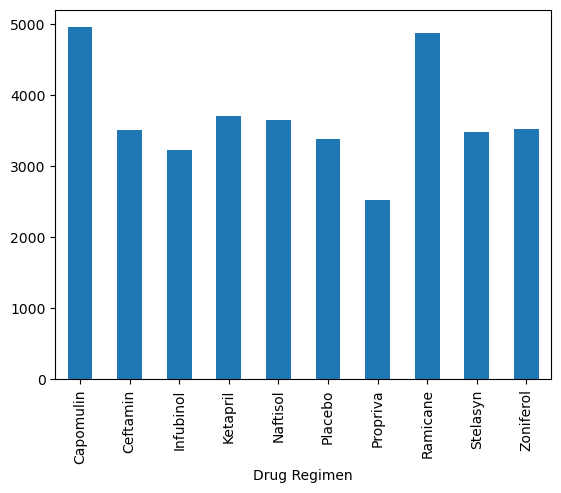

In [14]:
clean_study.groupby("Drug Regimen")["Timepoint"].sum().plot.bar()
plt.show()

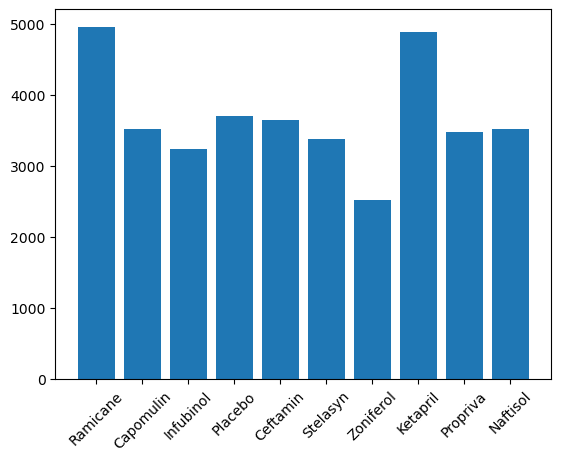

In [15]:
plt.bar(clean_study["Drug Regimen"].unique(),clean_study.groupby("Drug Regimen")["Timepoint"].sum())
plt.xticks(rotation = 45)
plt.show()

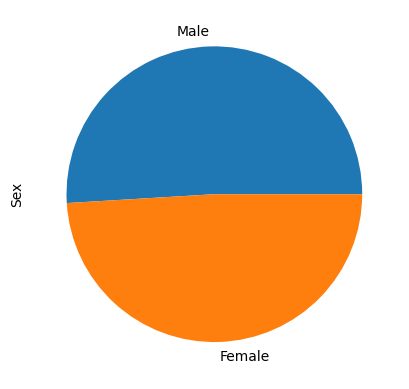

In [16]:
clean_study["Sex"].value_counts().plot.pie()
plt.show()

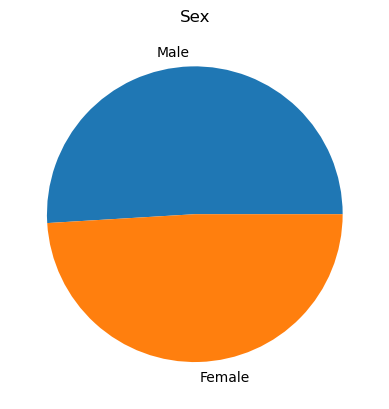

In [17]:
plt.pie(clean_study["Sex"].value_counts(),labels=["Male","Female"])
plt.title("Sex")
plt.show()


# quartiles, outliers and boxplot

In [40]:
# A DatFrame that has the last timepoint for each mouse ID is created
max_tumor = clean_study.groupby("Mouse ID").max("Timepoint")
max_tumor_w_drug = pd.concat([max_tumor,clean_study])

# The index of the DataFrame is reset
max_tumor_w_drug.set_index("Mouse ID",inplace=True)
max_tumor_w_drug.dropna(inplace = True)
max_tumor_w_drug


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex
Mouse ID,,,,,,,
k403,21,16,0,45.000000,0,Ramicane,Male
k403,21,16,5,38.825898,0,Ramicane,Male
k403,21,16,10,35.014271,1,Ramicane,Male
k403,21,16,15,34.223992,1,Ramicane,Male
k403,21,16,20,32.997729,1,Ramicane,Male
...,...,...,...,...,...,...,...
z969,9,30,25,63.145652,2,Naftisol,Male
z969,9,30,30,65.841013,3,Naftisol,Male
z969,9,30,35,69.176246,4,Naftisol,Male


In [41]:
# Retrieve the maximum timepoint for each mouse.
max_tumor_w_drug["Timepoint"]

Mouse ID
k403     0
k403     5
k403    10
k403    15
k403    20
        ..
z969    25
z969    30
z969    35
z969    40
z969    45
Name: Timepoint, Length: 1880, dtype: int64

In [42]:
# The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list.
# An empty list is created to fill with tumor volume data.
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []

In [46]:
cap_tum_quan = max_tumor_w_drug[max_tumor_w_drug["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ram_tum_quan = max_tumor_w_drug[max_tumor_w_drug["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
inf_tum_quan = max_tumor_w_drug[max_tumor_w_drug["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
cef_tum_quan = max_tumor_w_drug[max_tumor_w_drug["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

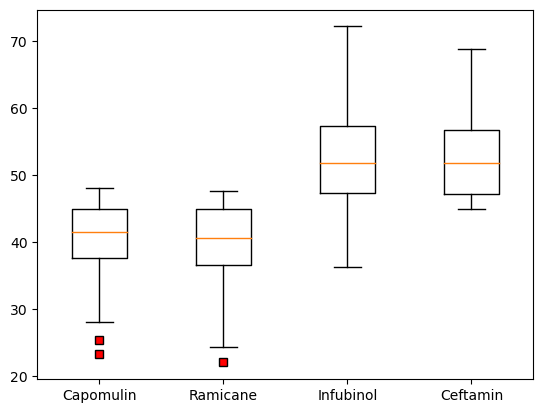

In [51]:
plt.boxplot([cap_tum_quan,ram_tum_quan,inf_tum_quan,cef_tum_quan], flierprops = dict(marker = "s", markerfacecolor = "red"))
plt.xticks([1,2,3,4], drugs)
plt.show()

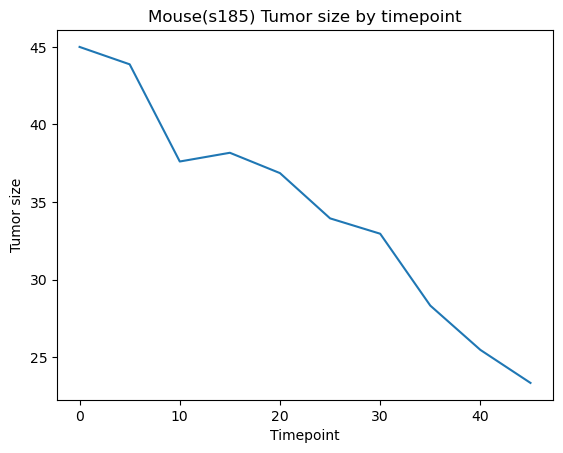

In [81]:
# A line plot is generated that shows the tumor volume vs. time point for one mouse treated with Capomulin.
one_mouse = clean_study[clean_study["Mouse ID"]=="s185"]

plt.plot(one_mouse["Timepoint"],one_mouse["Tumor Volume (mm3)"])
plt.title("Mouse(s185) Tumor size by timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor size")
plt.show()

Text(0.5, 1.0, 'Average Tumor volume vs weight(Capomulin)')

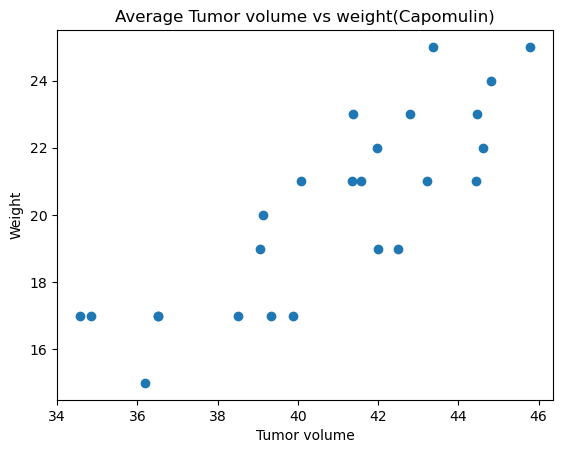

In [92]:
cap_study = clean_study[clean_study["Drug Regimen"] == "Capomulin"]
cap_study.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
cap_study.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(cap_study.groupby("Mouse ID")["Tumor Volume (mm3)"].mean(),cap_study.groupby("Mouse ID")["Weight (g)"].mean())
plt.xlabel("Tumor volume")
plt.ylabel("Weight")
plt.title("Average Tumor volume vs weight(Capomulin)")

In [93]:
import scipy.stats as st

In [97]:
regression = st.linregress(cap_study.groupby("Mouse ID")["Tumor Volume (mm3)"].mean(),cap_study.groupby("Mouse ID")["Weight (g)"].mean())
correlation_coefficient = st.pearsonr(cap_study.groupby("Mouse ID")["Tumor Volume (mm3)"].mean(),cap_study.groupby("Mouse ID")["Weight (g)"].mean())

In [100]:
print(regression)
print(correlation_coefficient)

LinregressResult(slope=0.7426941826944183, intercept=-10.148863164111344, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.09924763572688555, intercept_stderr=4.05717469676088)
PearsonRResult(statistic=0.8419363424694719, pvalue=1.3225722434712586e-07)
